<a href="https://colab.research.google.com/github/HeliosRider/deep-learning-challenge/blob/main/AlphabetSoupCharity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [47]:
# Import our dependencies
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
from pathlib import Path
#application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
#file_path = Path("Resources/loan_data.csv")
#application_df.tail()

# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/loan_data.csv")

loan_df = pd.read_csv(file_path)

# Review the DataFrame
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [48]:
# Verify number of samples and features in current DatatFrame.

loan_df.shape


(45000, 14)

In [49]:
# Drop the non-beneficial ID columns, 'person_gender' and 'person_education'.

loan_df = loan_df.drop(columns=['person_gender','person_education'])
new_loan_df=loan_df
new_loan_df.head()

,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [50]:
# Verify number of samples and features updated from dropping 'person_gender' and 'person_education'..
new_loan_df.shape

(45000, 12)

In [51]:
# Convert categorical data to numeric with `pd.get_dummies`
new_loan_df = pd.get_dummies(new_loan_df)
new_loan_df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_home_ownership_MORTGAGE,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,False,True,False,False,False,False,True,False,True,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,True,False,False,True,False,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,True,...,False,False,False,False,False,True,False,False,True,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,True,False,False,False,True,False,False,True,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,False,...,False,True,False,False,False,True,False,False,True,False


In [73]:
# Split the preprocessed data into our features and target arrays
y =new_loan_df['loan_status'].values
X = new_loan_df.drop(columns=['loan_status']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [74]:

# Convert X_train (NumPy array) to a DataFrame
X_train_df = pd.DataFrame(X_train)

# Now you can use isnull() to check for missing values
print(X_train_df.isnull().sum())


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64


In [77]:
print(X_test.shape)

(11250, 20)


In [78]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [80]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
[20]

# Create the Keras Sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dnn = tf.keras.models.Sequential()

# First hidden layer
dnn.add(Dense(20, activation='relu', input_shape=(number_input_features,)))

# Second hidden layer
dnn.add(Dense(64, activation='relu'))

# Output layer
dnn.add(Dense(1, activation='sigmoid'))

# Check the structure of the model
dnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,829 (7.14 KB)

 Trainable params: 1,829 (7.14 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# Compile the model
from tensorflow.keras.optimizers import Adam
dnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# Created a callback that saves the model's weights every five epochs.

class SaveWeightsEveryFiveEpochs(tf.keras.callbacks.Callback):

    def __init__(self, save_path):
        super(SaveWeightsEveryFiveEpochs, self).__init__()
        self.save_path = save_path

    def on_epoch_end(self, epoch, logs=None):
        # Check if the epoch is divisible by 5
        if (epoch + 1) % 5 == 0:
            # Ensure the save directory exists
            os.makedirs(self.save_path, exist_ok=True)
            # Save the model weights
            self.model.save_weights(f"{self.save_path}/weights_epoch_{epoch + 1}.weights.h5")

# Save the weights to a directory "weights" in the current working directory

#save_path = "weights"

#save_weights_callback = SaveWeightsEveryFiveEpochs(save_path)

In [82]:
# Train the model
fit_model = dnn.fit(X_train_scaled, y_train, epochs=50) #callbacks=[save_weights_callback])

Epoch 1/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8437 - loss: 0.3220
Epoch 2/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9067 - loss: 0.2059
Epoch 3/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9142 - loss: 0.1932
Epoch 4/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9175 - loss: 0.1850
Epoch 5/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9183 - loss: 0.1815
Epoch 6/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9219 - loss: 0.1763
Epoch 7/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9188 - loss: 0.1762
Epoch 8/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9233 - loss: 0.1721
Epoch 9/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9252 - loss: 0.1701
Epoch 10/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9219 - loss: 0.1735
Epoch 11/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9231 - loss: 0.1690
Epoch 12/50
1055/1055 ━━━━━━━━

In [83]:
# Evaluate the model using the test data
model_loss, model_accuracy = dnn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

352/352 - 1s - 2ms/step - accuracy: 0.9158 - loss: 0.1870
Loss: 0.18703876435756683, Accuracy: 0.9158222079277039


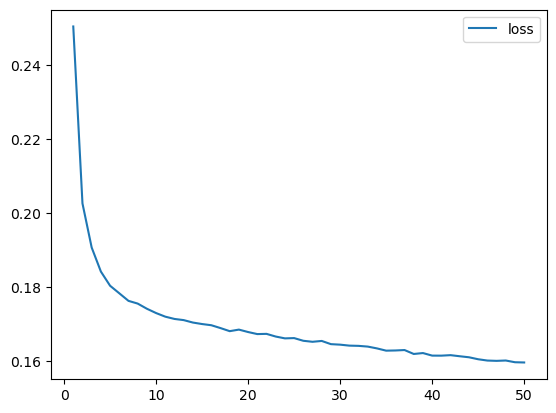

In [84]:
# Displaying a plot of the model loss data

# First, create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Secondly, ncrease the index by 1 to match the number of epochs
history_df.index += 1

# lastly, Plot the loss
history_df.plot(y="loss")
plt.show()

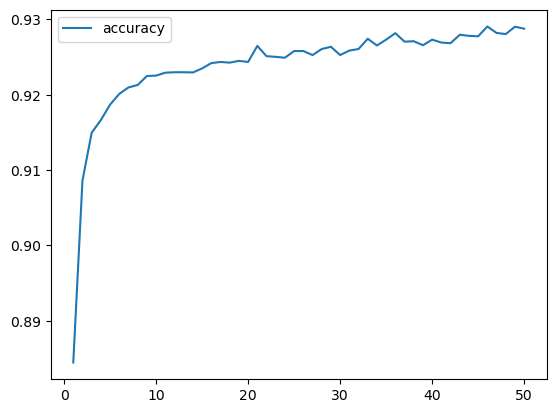

In [85]:
# Displaying a plot of the model accuracy data

# Plotting  the accuracy
history_df.plot(y="accuracy")
plt.show()